# Linear models

### Outline <a name = 'outline'></a>
* [Data generation](#data) 
* [Model training](#models) 
* [Cross Validation Quality Assessment](#cv) 
* [Grid Search For Optimal Parameters](#grid)
* [Text Data Classification](#text)

In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np

In [2]:
%matplotlib inline

[** Linear models:**](#linear) 
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

documentation: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

examples: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### Data Generation <a name = 'data'></a>

In [3]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 3.5, random_state=1)

In [8]:
blobs[0]

array([[  1.3693668 ,  -3.64889557],
       [ -7.03615024,  -6.96165434],
       [ -6.71395822,   2.64085935],
       [ -0.85422833,   7.073529  ],
       [ -1.14857253,  -4.82357027],
       [ -7.19119889,  -3.790363  ],
       [ -7.61746806,  -5.07265414],
       [ -7.22288847,  -6.1357061 ],
       [ -5.51172703,   8.41302285],
       [  0.05025361,   4.14198887],
       [-10.13314679,  -9.60855179],
       [ -1.23318546,   8.35968355],
       [-10.3842771 ,  -6.11411577],
       [ -4.27461393,  10.33008097],
       [ -2.33026345, -10.59061178],
       [ -6.54553935,  -3.20597989],
       [ -9.18398155,  -1.56441862],
       [ -4.06466436,   1.44827012],
       [ -2.86304777,   4.55907887],
       [-13.82990396,  -3.36051003],
       [ -8.02804867,  -3.11076872],
       [-10.92947727,  -3.83919763],
       [ -9.12691544,  -4.99159258],
       [ -0.54292307,   3.53369355],
       [ -2.97305723,   2.17093344],
       [-11.08312121, -12.47528072],
       [ -8.45293695,  -4.30389186],
 

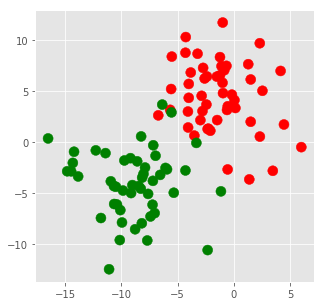

In [11]:
plt.figure(figsize = (5, 5))

plt.scatter(blobs[0][:,0], 
            blobs[0][:,1], 
            c = blobs[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'green']),
            s = 100)

[back to outline](#outline)

### Model training <a name = 'models'></a>

In [12]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    blobs[0], blobs[1], test_size = 0.3, random_state = 1)

**Ridge regression**

In [13]:
#classifier instance
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [14]:
ridge_classifier

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [16]:
?ridge_classifier.fit

In [15]:
#classifier training
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [59]:
#predictions generation
ridge_predictions = ridge_classifier.predict(test_data)

In [18]:
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


In [19]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [22]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.9571428571428572

In [23]:
#feature weights
print(ridge_classifier.coef_)
print(ridge_classifier.intercept_)

[[-0.11164518 -0.0925014 ]]
[-0.50073421]


In [24]:
#separating line
k = round(-1*ridge_classifier.coef_[0][0]/ridge_classifier.coef_[0][1], 3)
b = round(-1*ridge_classifier.intercept_[0]/ridge_classifier.coef_[0][1], 3)

In [25]:
if b >= 0:
    print(f'y = {k}x + {b}')
else:
    print(f'y = {k}x {b}')

y = -1.207x -5.413


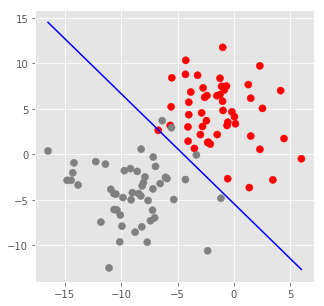

In [33]:
plt.figure(figsize = (5, 5))

plt.scatter(blobs[0][:,0], 
            blobs[0][:,1],
            c = blobs[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'grey']),
            s = 50)

x = np.linspace(np.min(blobs[0][:,0]), np.max(blobs[0][:,0]), 20)
y = k*x + b
plt.plot(x, y, '-b')

**Logistic regression**

In [34]:
log_regressor = linear_model.LogisticRegression(random_state = 0)
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
lr_predictions = log_regressor.predict(test_data)
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [36]:
print(lr_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [37]:
print(lr_proba_predictions)

[[9.99964463e-01 3.55366566e-05]
 [6.59642915e-01 3.40357085e-01]
 [7.01850415e-01 2.98149585e-01]
 [4.73762142e-05 9.99952624e-01]
 [9.29085437e-01 7.09145630e-02]
 [4.01441241e-01 5.98558759e-01]
 [9.99279239e-01 7.20760967e-04]
 [9.97629335e-01 2.37066452e-03]
 [9.92246873e-01 7.75312694e-03]
 [3.08558342e-03 9.96914417e-01]
 [9.87109827e-01 1.28901728e-02]
 [8.29682548e-05 9.99917032e-01]
 [9.70073741e-01 2.99262589e-02]
 [8.71244984e-04 9.99128755e-01]
 [1.98341812e-05 9.99980166e-01]
 [3.57517290e-06 9.99996425e-01]
 [3.86966857e-01 6.13033143e-01]
 [9.87062765e-01 1.29372353e-02]
 [3.75421731e-01 6.24578269e-01]
 [3.01514496e-06 9.99996985e-01]
 [1.60068448e-01 8.39931552e-01]
 [9.99675824e-01 3.24175856e-04]
 [9.98353859e-01 1.64614060e-03]
 [1.38720505e-02 9.86127949e-01]
 [1.19762927e-05 9.99988024e-01]
 [7.53815726e-05 9.99924618e-01]
 [9.13128097e-03 9.90868719e-01]
 [9.70277465e-01 2.97225346e-02]
 [9.99238510e-01 7.61490100e-04]
 [2.30124217e-05 9.99976988e-01]]


In [39]:
#separating line
k = round(-1*log_regressor.coef_[0][0]/log_regressor.coef_[0][1], 3)
b = round(-1*log_regressor.intercept_[0]/log_regressor.coef_[0][1], 3)

In [40]:
if b >= 0:
    print(f'y = {k}x + {b}')
else:
    print(f'y = {k}x {b}')

y = -1.145x -2.62


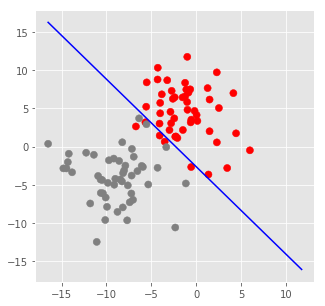

In [41]:
plt.figure(figsize = (5, 5))

plt.scatter(blobs[0][:,0], 
            blobs[0][:,1],
            c = blobs[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'grey']),
            s = 50)

x = np.linspace(np.min(blobs[0][:,0]), np.max(blobs[0][:,1]), 20)
y = k*x + b
plt.plot(x, y, '-b')

In [42]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8666666666666667


In [ ]:
lr_proba_predictions[:,1]

In [ ]:
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

[back to outline](#outline)

### Cross Validation Quality Assessment <a name = 'cv'></a>

**K-Fold**

In [45]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

y = np.array([0,0,0,0,0,1,1,1,1,1])

In [49]:
kf = model_selection.KFold(n_splits = 5, random_state = None, shuffle = True)

for train_index, test_index in kf.split(x):
    print("train:", x[train_index], "test:", x[test_index])
    #print(f'train target: {y[train_index]}, test target:{y[test_index]}')

train: [ 1  2  3  4  5  7  9 10] test: [6 8]
train: [ 1  4  5  6  7  8  9 10] test: [2 3]
train: [1 2 3 5 6 7 8 9] test: [ 4 10]
train: [ 1  2  3  4  6  8  9 10] test: [5 7]
train: [ 2  3  4  5  6  7  8 10] test: [1 9]


**Startified K-Fold**

In [52]:
skf = model_selection.StratifiedKFold(n_splits = 3, random_state = 10, shuffle = False)

for train_index, test_index in skf.split(x, y):
    #print("train:", x[train_index], "test:", x[test_index])
    print(f'train target: {y[train_index]}, test target:{y[test_index]}')

train target: [0 0 0 1 1 1], test target:[0 0 1 1]
train target: [0 0 0 1 1 1], test target:[0 0 1 1]
train target: [0 0 0 0 1 1 1 1], test target:[0 1]


In [53]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, 
                                                train_data, 
                                                train_labels, 
                                                scoring = 'accuracy', 
                                                cv = 10)

In [54]:
lr_scoring = model_selection.cross_val_score(log_regressor, 
                                             train_data, 
                                             train_labels, 
                                             scoring = metrics.make_scorer(metrics.accuracy_score,
                                                                      greater_is_better = True), 
                                             cv = 10)

In [55]:
ridge_scoring

array([0.875     , 0.875     , 1.        , 0.85714286, 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [56]:
lr_scoring

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.85714286, 1.        , 1.        , 0.83333333])

In [57]:
print('Cross validation score')
print(f'Ridge regression accuracy score mean:{ridge_scoring.mean():.3f}, std:{ridge_scoring.std():.3f}')
print(f'Log regression accuracy score mean:{lr_scoring.mean():.3f}, std:{lr_scoring.std():.3f}')

Cross validation score
Ridge regression accuracy score mean:0.946, std:0.066
Log regression accuracy score mean:0.969, std:0.062


In [60]:
print('Hold-out test score')
print(f'Ridge regression accuracy score: {metrics.accuracy_score(test_labels, ridge_predictions):.3f}')
print(f'Log regression accuracy score: {metrics.accuracy_score(test_labels, lr_predictions):.3f}')

Hold-out test score
Ridge regression accuracy score: 0.967
Log regression accuracy score: 0.867


[back to outline](#outline)

### Grid Search For Optimal Parameters <a name = 'grid'></a>

In [61]:
#model
regressor = linear_model.LogisticRegression()

In [65]:
?regressor

In [62]:
#parameters check 
regressor.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
#grid generation
parameters_grid = {
    'C' : [0.1, 0.5, 1., 2.],
    'penalty' : ['l1', 'l2'],
}

In [67]:
grid_cv = model_selection.GridSearchCV(regressor, parameters_grid) 

In [68]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: user 69.1 ms, sys: 3.69 ms, total: 72.7 ms
Wall time: 113 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1.0, 2.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
grid_cv.best_score_

0.9857142857142858

In [70]:
grid_cv.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [ ]:
print(f'best score:{grid_cv.best_score_:.3f}')
print(f'best parameters:{grid_cv.best_params_}')

In [72]:
clf = grid_cv.best_estimator_

In [73]:
clf.predict(test_data)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [75]:
grid_cv.cv_results_['mean_test_score']

array([0.91428571, 0.97142857, 0.97142857, 0.97142857, 0.98571429,
       0.97142857, 0.98571429, 0.98571429])

[back to outline](#outline)

### Text classification <a name = 'text'></a>

**Data loading**

In [76]:
train_data = datasets.fetch_20newsgroups(subset = 'train')
test_data = datasets.fetch_20newsgroups(subset = 'test')

In [77]:
test_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [78]:
print(train_data.data[10])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [79]:
print(train_data.target_names[train_data.target[10]])

rec.motorcycles


**Data Processing**

In [80]:
#option 1: count vectorizer
vectorizer = CountVectorizer(min_df = 100, stop_words={'english'})

vectorized_train_data = vectorizer.fit_transform(train_data.data)
vectorized_test_data = vectorizer.transform(test_data.data)

In [81]:
len(vectorizer.vocabulary_)

2429

In [82]:
#option 2: TFIDF vectorizer
tfidf_vectorizer = TfidfVectorizer(min_df = 10, max_df = 1000, stop_words={'english'})

tfidf_vectorized_train_data = tfidf_vectorizer.fit_transform(train_data.data)
tfidf_vectorized_test_data = tfidf_vectorizer.transform(test_data.data)

In [83]:
len(tfidf_vectorizer.vocabulary_)

15379

**Modeling**

In [84]:
#count vectorizer is used
model = linear_model.LogisticRegression()
model.fit(vectorized_train_data, train_data.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
train_preds = model.predict(vectorized_train_data)
test_preds = model.predict(vectorized_test_data)

In [86]:
print(f'train accuracy: {metrics.accuracy_score(train_data.target, train_preds):.3f}')
print(f'test accuracy: {metrics.accuracy_score(test_data.target, test_preds):.3f}')

train accuracy: 0.998
test accuracy: 0.696


In [87]:
test_obj = 'I understand the advantages of the Windows operating system \
despite the fact that I use a Mac system'
vectorized_test_obj = vectorizer.transform([test_obj])

In [88]:
print(vectorized_test_obj)

  (0, 669)	1
  (0, 844)	1
  (0, 1314)	1
  (0, 1522)	1
  (0, 1546)	1
  (0, 2117)	2
  (0, 2159)	1
  (0, 2160)	3
  (0, 2257)	1
  (0, 2280)	1
  (0, 2381)	1


In [89]:
print(model.predict(vectorized_test_obj)[0])

4


In [90]:
print(test_data.target_names[model.predict(vectorized_test_obj)[0]])

comp.sys.mac.hardware
